<a href="https://colab.research.google.com/github/kiselpd/HW2_ML/blob/main/4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib notebook

In [73]:
theta = np.array([1, 2, 3])

X_data =  np.array([[ 1,  1, 1],
               [-1, -2, 1],
               [-1, -2, 2],
               [-2, -2, -3]
              ])

y_data = np.array([1, 1, -1, -1])

In [94]:
def probability(theta, X):
    result = 1/(1+np.e**(-np.dot(X, theta)))
    return result
prob = probability(theta, X_data)

assert type(prob) == np.ndarray, 'Возвращается неверный тип'
assert prob.shape == (X_data.shape[0],), 'Неверный размер массива'
assert (prob.round(3) == [0.998, 0.119, 0.731, 0.]).all(), 'Функция считается неверно'
prob

ValueError: ignored

In [14]:
def binary_class_prediction(theta, X, threshold =.5):
    prob =  probability(theta, X)
    result = np.where(prob < threshold, -1, 1)
    return result

y_pred = binary_class_prediction(theta, X_data)

assert type(y_pred) == np.ndarray, 'Возвращается неверный тип'
assert y_pred.shape == (X_data.shape[0],), 'Неверный размер массива'
assert min(y_pred) == -1, 'Функция считается неверно'
assert max(y_pred) == 1, 'Функция считается неверно'
y_pred

array([ 1, -1,  1, -1])

In [105]:
def logloss(theta, X, y): 
    result=np.sum(np.log(1+np.exp(-(y * (X @ theta)))))
    return result/np.size(y)

assert logloss(theta, X_data, y_data).round(3) == 0.861, 'Функция считается неверно'

ValueError: ignored

In [102]:
def gradient(theta, X, y):
    result = np.array(1 / X.shape[0] * np.sum(1 / (1 + np.exp(-(y * (X @ theta)))) * np.exp(-(y * (X @ theta)))) * (y @ X))
    return result

assert gradient(theta, X_data, y_data).shape == theta.shape, 'Неверный размер массива'

ValueError: ignored

In [103]:
def fit(X, y, batch_size=10, h=0.05,  iters=100, plot=True):

    # получаем размерности матрицы
    size, dim = X.shape

    # случайная начальная инициализация
    theta = np.random.uniform(size=dim)
    
    errors = []
    
    theta_history = theta
    colors = [plt.get_cmap('gist_rainbow')(i) for i in np.linspace(0,1,dim)]
    
    # plt 
    if plot:
        fig = plt.figure(figsize=(15, 10))
        ax1 = fig.add_subplot(221)
        ax2 = fig.add_subplot(222)
        ax3 = fig.add_subplot(212)
        fig.suptitle('Gradient descent')
        
        
    for _ in range(iters):  
        
        # берём случайный набор элементов
        batch = np.random.choice(size, batch_size, replace=False)
        X_batch = X[batch]
        y_batch = y[batch]

        # считаем производные
        grad = gradient(theta, X_batch, y_batch)
        
        assert type(grad) == np.ndarray, 'неверный тип'
        assert len(grad.shape) == 1, 'Необходимо вернуть одномерный вектор'
        assert grad.shape[0] == len(theta), 'длина вектора должна быть равной количеству весов'
        
        
        # Обновляем веса
        
        theta -= grad * h
        
        theta_history = np.vstack((theta_history, theta))
        
        # error
        loss = logloss(theta, X, y)
        errors.append(loss)
        
        if plot:
            ax1.clear()            
            ax1.scatter(range(dim), theta, label='Gradient solution')
            ax1.legend(loc="upper left")
            ax1.set_title('theta')
            ax1.set_ylabel(r'$\bar \beta$')
            ax1.set_xlabel('weight ID')
            
            
            ax2.plot(range(_+1), errors, 'g-')
            ax2.set_title('logloss')
            ax2.set_xlabel('itarations')
            
            ax3.plot(theta_history)
            ax3.set_title('update theta')
            ax3.set_ylabel('value')
            ax3.set_xlabel('itarations')
            time.sleep(0.05)
            fig.canvas.draw()   
            
    return theta

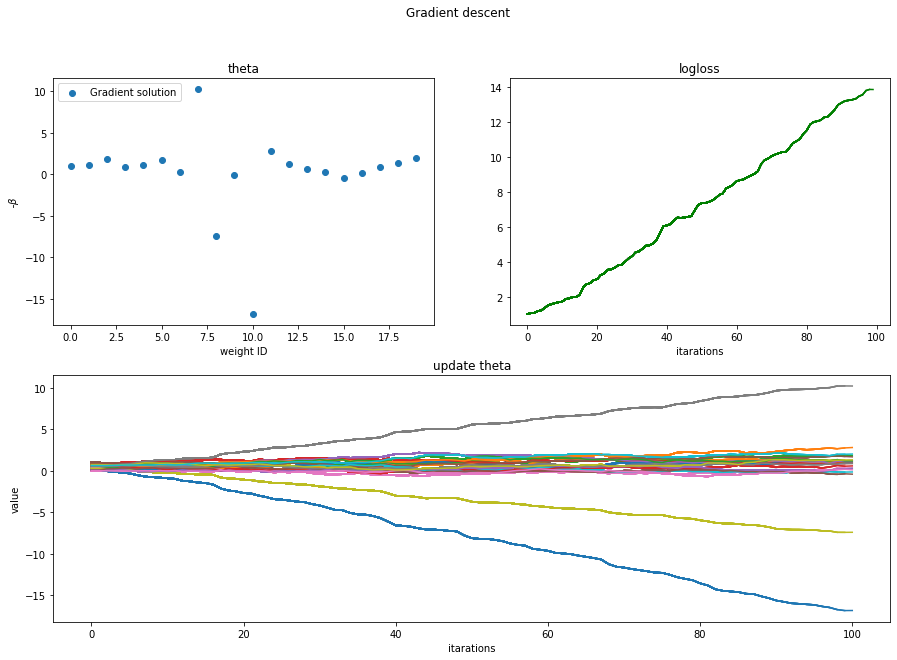

In [104]:
X_data, y_data = make_classification(n_samples=2000)
optimal_theta = fit(X_data, y_data)
y_pred = binary_class_prediction(optimal_theta, X_data)